In [12]:
import pandas as pd
import seaborn as sns
from pdc_project import plot
from matplotlib import pyplot as plt
import numpy as np
import math

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [13]:
def expten(series):
    num = series.mean()
    stderror = series.sem()
    if num != 0:
        logten = np.floor(np.log10(abs(num)))
        divide = num/10**logten
        stderror_divide = stderror/10**logten
        return r"$({:.3g}\pm{:.3f})\times10^{}$".format(divide,stderror_divide,int(logten))
    else:
        return num

In [14]:
coolingflow_biotemp

,Step,Percent,Kp,Tau,Td
0,-88.0,-20,-0.001960,6.386137,0.002274
1,-83.6,-19,-0.001951,6.384882,0.002254
2,-79.2,-18,-0.001915,6.385407,0.002216
3,-74.8,-17,-0.001907,6.384962,0.002209
4,-70.4,-16,-0.001870,6.384048,0.002181
5,-66.0,-15,-0.001864,6.383540,0.002158
6,-61.6,-14,-0.001859,6.383245,0.002134
7,-57.2,-13,-0.001821,6.384187,0.002045
8,-52.8,-12,-0.001818,6.385754,0.002015
9,-48.4,-11,-0.001777,6.387561,0.001961


In [29]:
coolingflow_biotemp = pd.read_excel("out/percent_coolingflow_biotemp.xlsx")
coolingflow_ethanolconc = pd.read_excel("out/percent_coolingflow_ethanolconc.xlsx")
feedglucose_biotemp = pd.read_excel("out/percent_feedglucoseconc_biotemp.xlsx")
feedglucoseconc_ethanolconc = pd.read_excel("out/percent_feedglucoseconc_ethanolconc.xlsx")
display(coolingflow_biotemp.apply(lambda x: "{:.4e} ± {:.3e}".format(x.mean(), x.sem())))
display(coolingflow_ethanolconc.apply(lambda x: "{:.4e} ± {:.3e}".format(x.mean(), x.sem())))
display(feedglucose_biotemp.apply(lambda x: "{:.4e} ± {:.3e}".format(x.mean(), x.sem())))
display(feedglucoseconc_ethanolconc.apply(lambda x: "{:.4e} ± {:.3e}".format(x.mean(), x.sem())))
# display(coolingflow_biotemp.apply(lambda x: expten(x)))
# display(coolingflow_ethanolconc.apply(lambda x: expten(x)))
# display(feedglucose_biotemp.apply(lambda x: expten(x)))
# display(feedglucoseconc_ethanolconc.apply(lambda x: expten(x)))


Step        7.1054e-16 ± 8.440e+00
Percent     0.0000e+00 ± 1.918e+00
Kp         -1.6362e-03 ± 2.736e-05
Tau         6.3908e+00 ± 9.367e-04
Td          1.9541e-03 ± 6.551e-05
dtype: object

Step       7.1054e-16 ± 8.440e+00
Percent    0.0000e+00 ± 1.918e+00
Kp         9.1199e-04 ± 1.956e-05
Tau        1.7754e+01 ± 1.902e-02
Td         8.1306e+00 ± 7.514e-03
dtype: object

Step       0.0000e+00 ± 5.275e+00
Percent    0.0000e+00 ± 1.918e+00
Kp         1.9247e-04 ± 5.629e-06
Tau        1.8486e+01 ± 2.614e-01
Td         5.8861e+00 ± 4.532e-02
dtype: object

Step       0.0000e+00 ± 5.275e+00
Percent    0.0000e+00 ± 1.918e+00
Kp         1.2952e-03 ± 3.770e-05
Tau        2.6932e+01 ± 3.898e-01
Td         3.1774e+00 ± 4.491e-02
dtype: object

In [39]:
G = np.array([[coolingflow_biotemp.mean()["Kp"],coolingflow_ethanolconc.mean()["Kp"]],[feedglucose_biotemp.mean()["Kp"],feedglucoseconc_ethanolconc.mean()["Kp"]]])

G*np.transpose(np.linalg.inv(G))
G

array([[-0.00163623,  0.00091199],
       [ 0.00019247,  0.0012952 ]])

In [16]:
def summary(df, title = "", relative = False):
    df = df.copy()
    vals = ["Kp", "Tau", "Td"]
    ylabel = [r"$K_p/\overline{K_p}$", r"$\tau/\overline{\tau}$", r"$T_d/\overline{T_d}$"]
    if relative:
        df[vals]= df[vals]/df[vals].mean().abs()
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(10,3)
    mean = df.mean()
    sem = df.sem()
    std = df.std()
    for i in range(3):
        val = vals[i]
        sns.lineplot(df, x = "Percent", y = val, ax = ax[i])
        ax[i].set_title(title)
        ax[i].axhspan(mean[val]-sem[val], mean[val]+sem[val], alpha=0.2)
        ax[i].axhspan(mean[val]-std[val], mean[val]+std[val], alpha=0.2)
        ax[i].set_xlabel("Percentage Step/%")
        if relative and mean[val] > 0:
            ax[i].set_ylim([0,2])
        elif relative and mean[val] < 0: 
                ax[i].set_ylim([-2,0])
        ax[i].set_ylabel(ylabel[i])
    return fig, ax

In [17]:
coolingflow_biotemp.sem()

Step       8.440075
Percent    1.918199
Kp         0.000027
Tau        0.000937
Td         0.000066
dtype: float64

(<Figure size 3000x900 with 3 Axes>,
 array([<AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Percentage Step/%', ylabel='$K_p/\\overline{K_p}$'>,
        <AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Percentage Step/%', ylabel='$\\tau/\\overline{\\tau}$'>,
        <AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Percentage Step/%', ylabel='$T_d/\\overline{T_d}$'>],
       dtype=object))

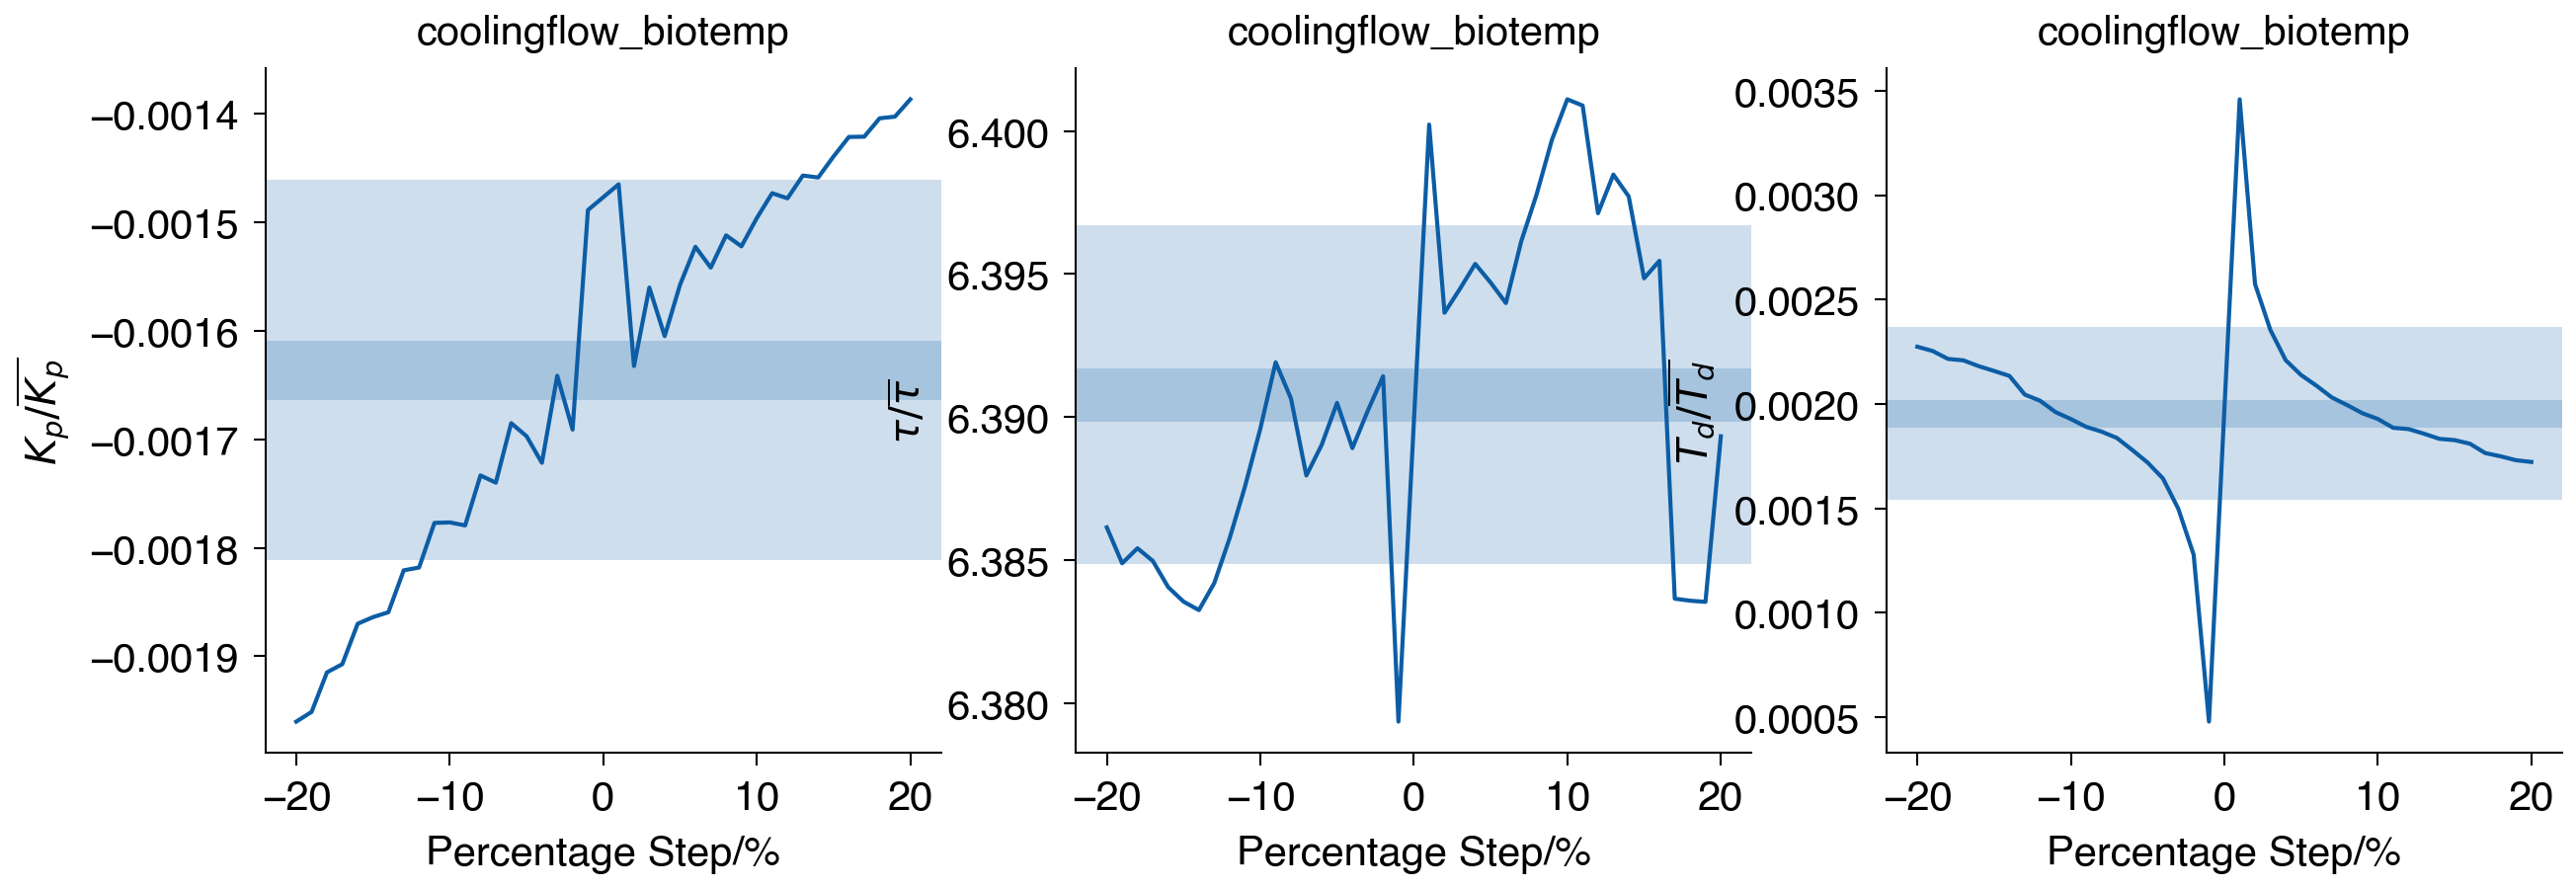

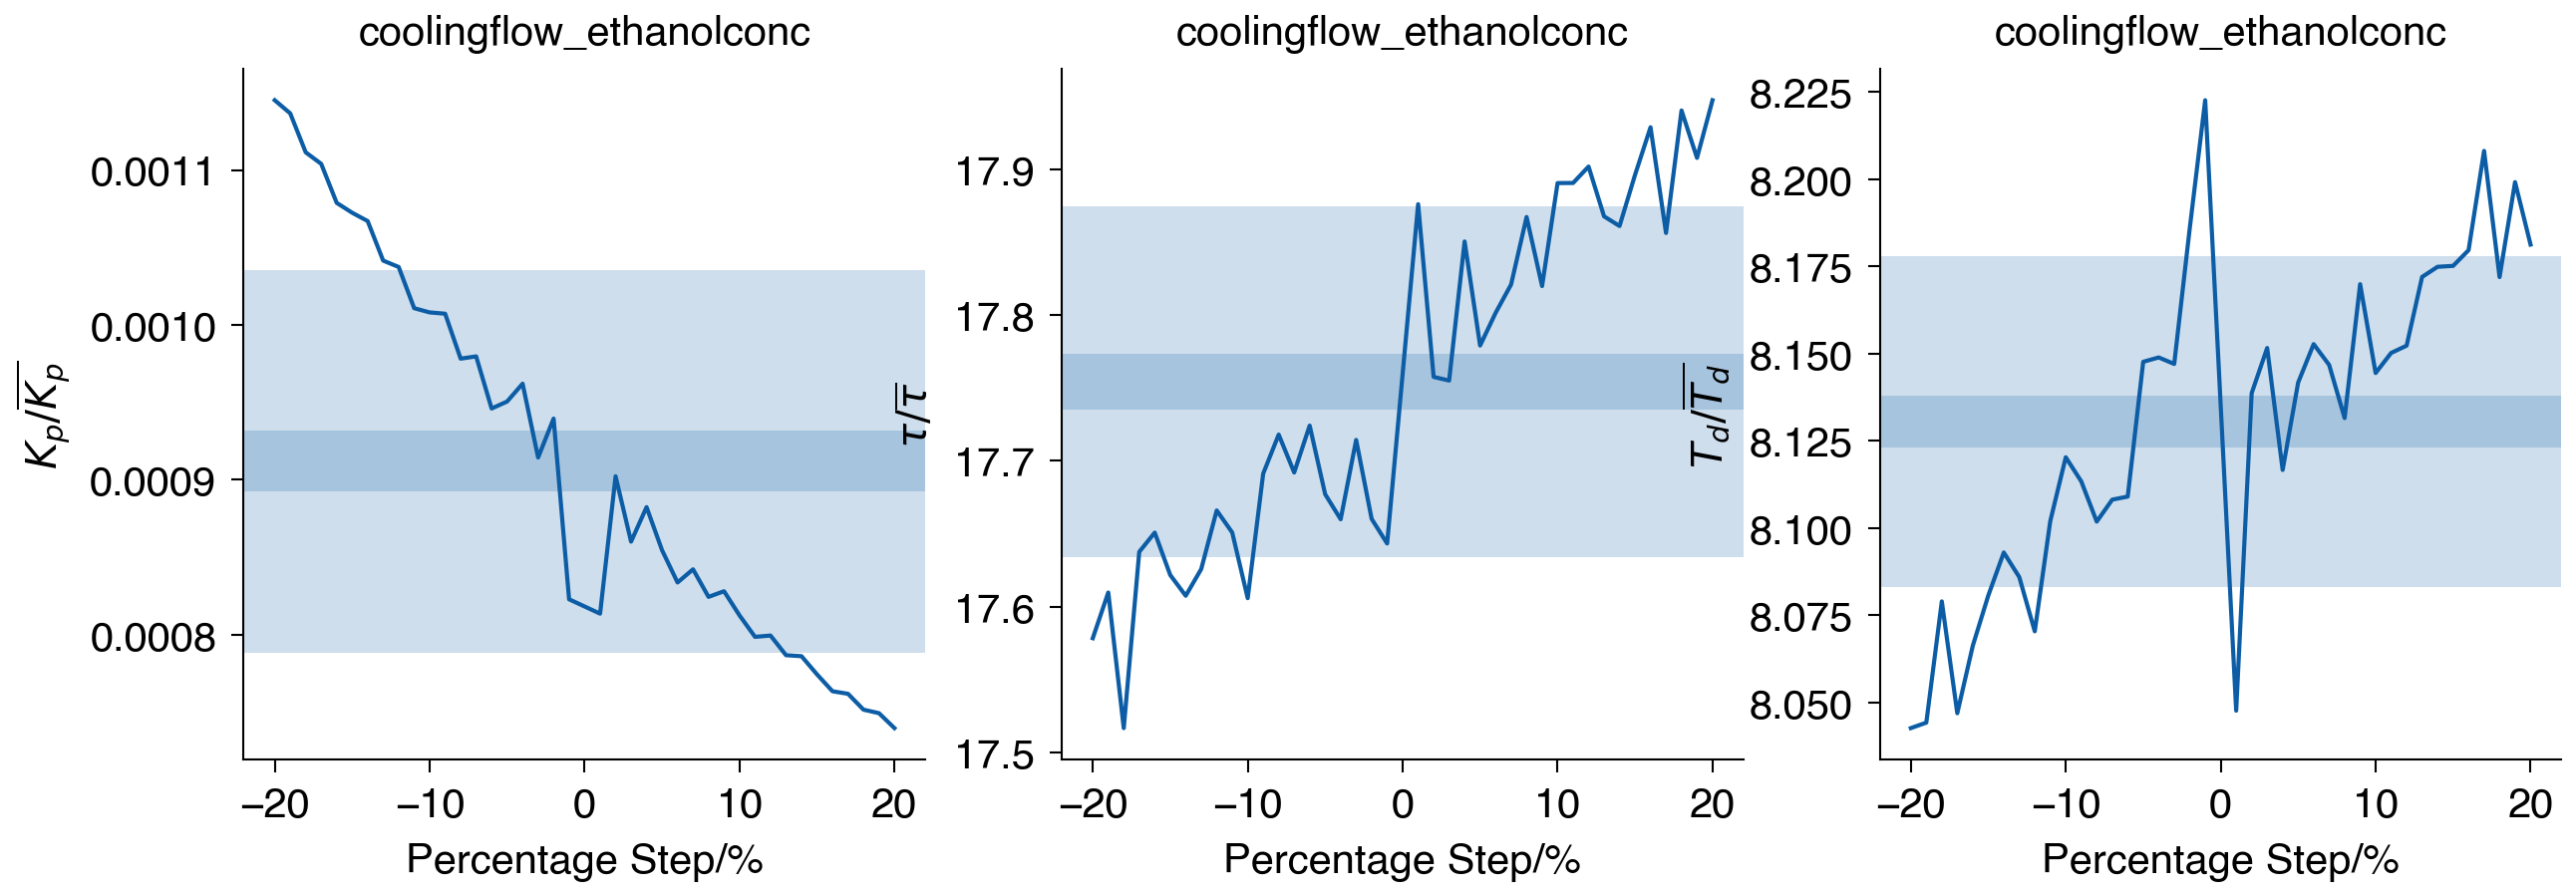

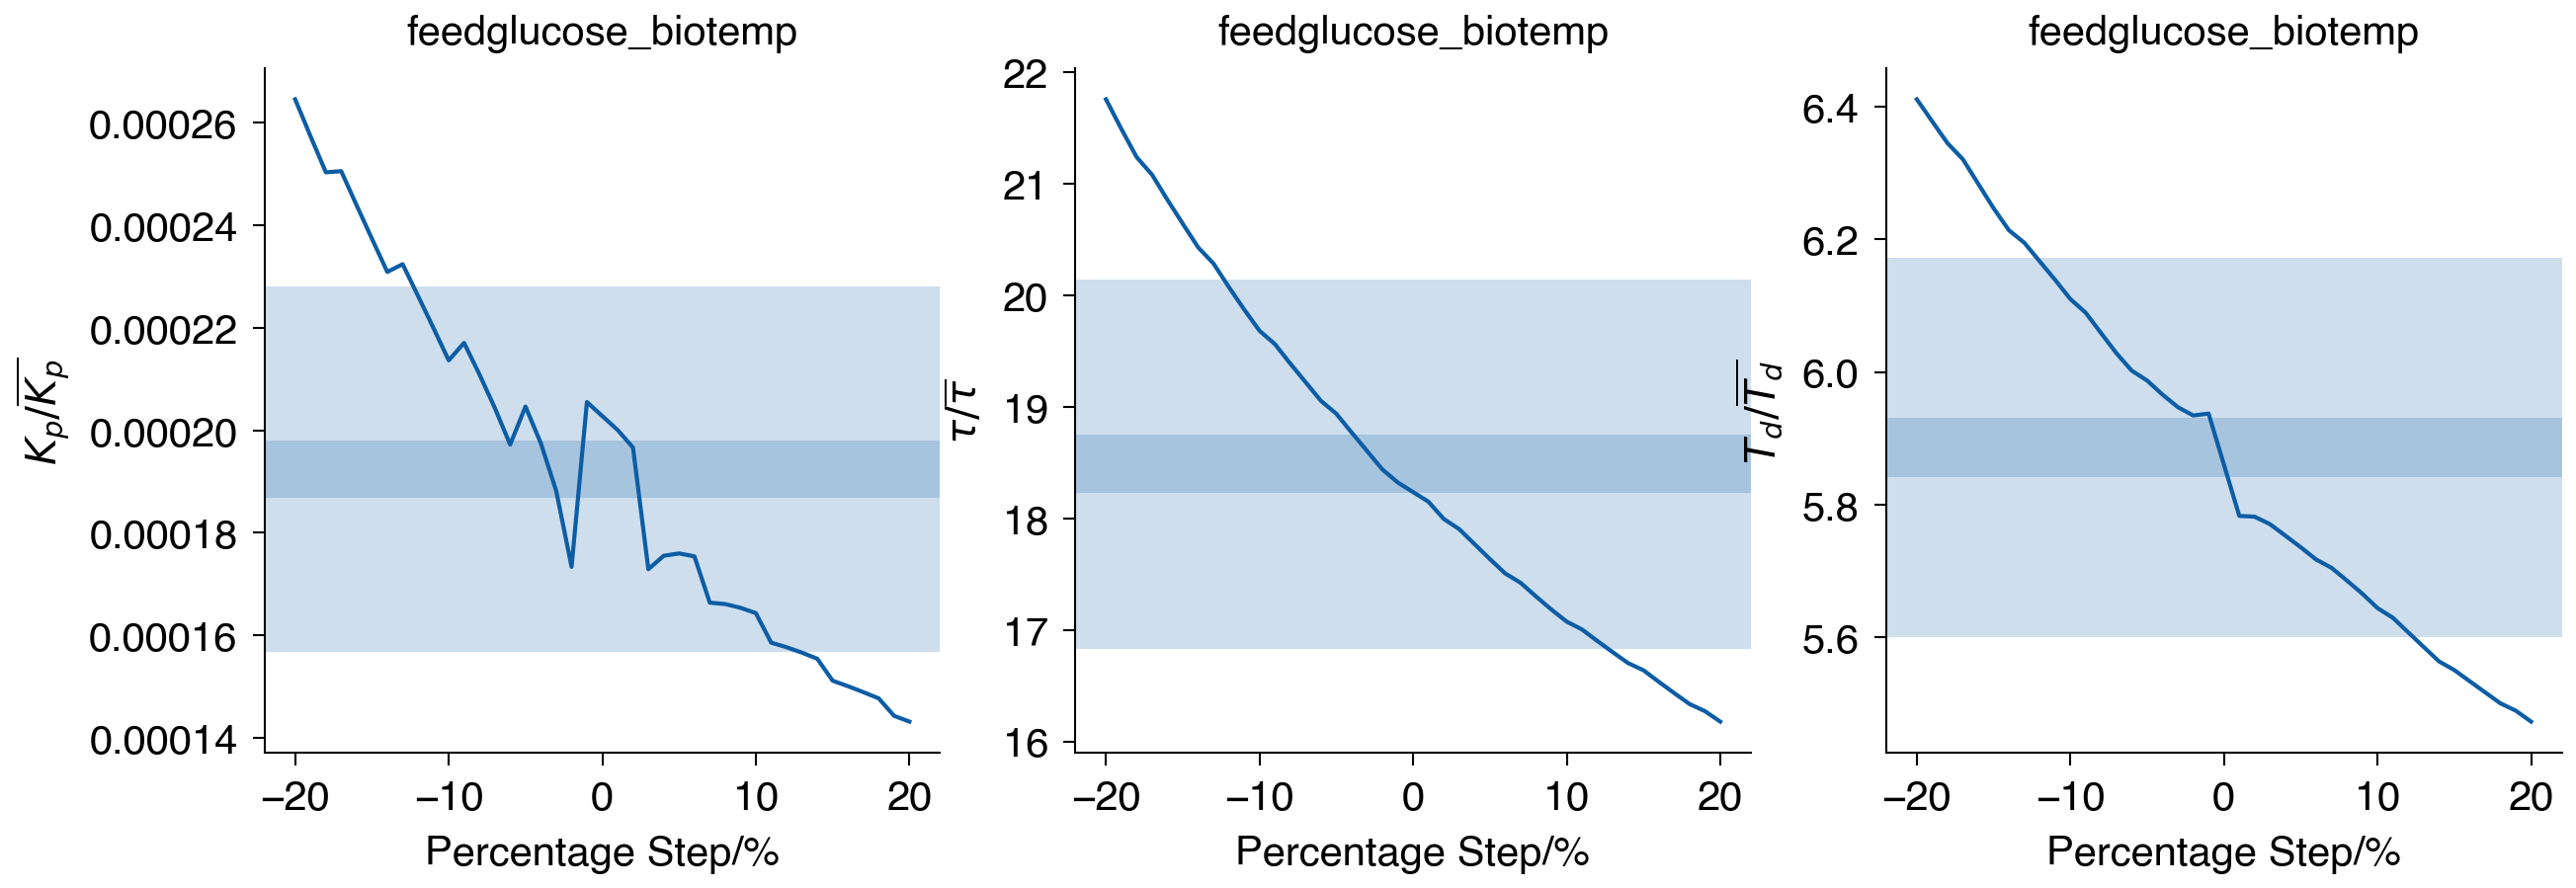

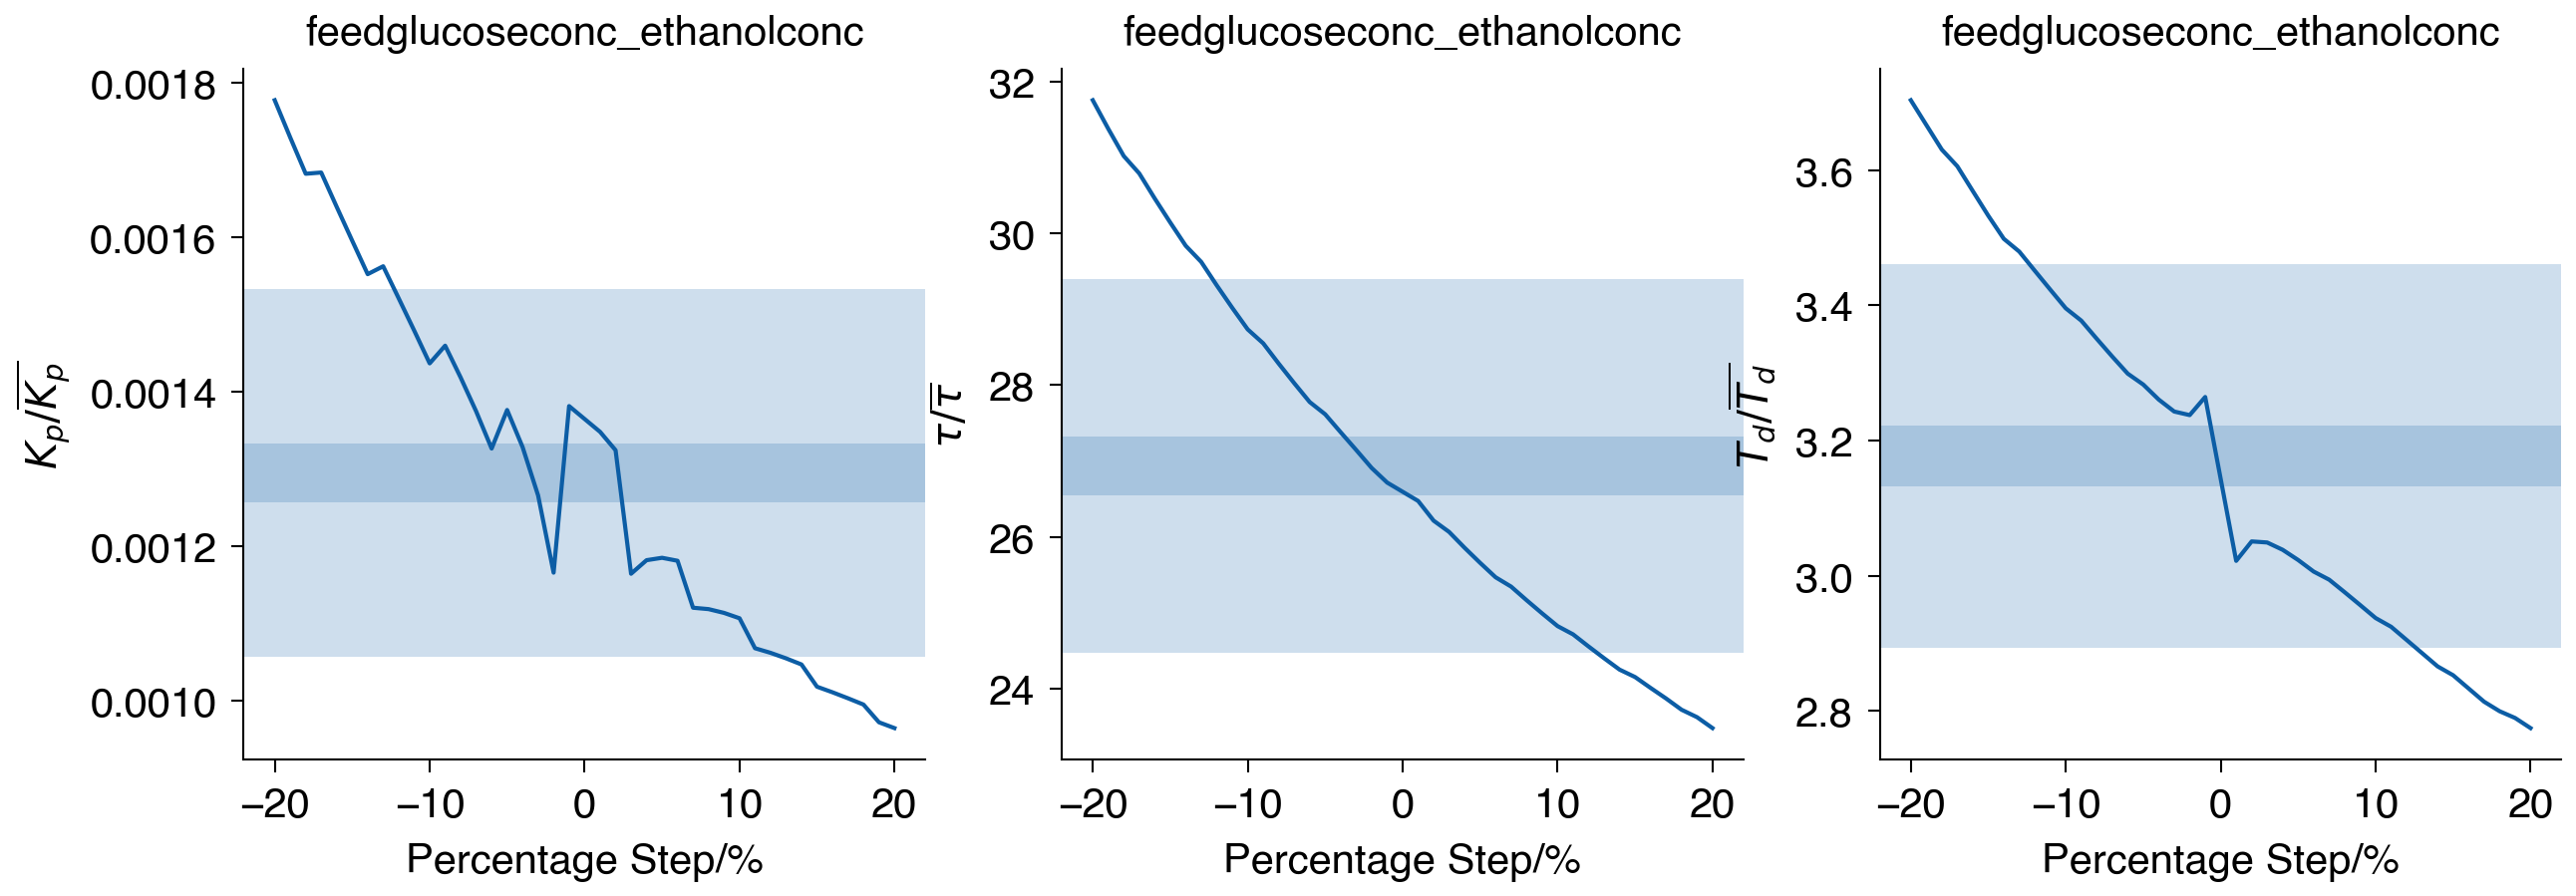

In [18]:
summary(coolingflow_biotemp, "coolingflow_biotemp")
summary(coolingflow_ethanolconc, "coolingflow_ethanolconc")
summary(feedglucose_biotemp, "feedglucose_biotemp")
summary(feedglucoseconc_ethanolconc, "feedglucoseconc_ethanolconc")



(<Figure size 3000x900 with 3 Axes>,
 array([<AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Percentage Step/%', ylabel='$K_p/\\overline{K_p}$'>,
        <AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Percentage Step/%', ylabel='$\\tau/\\overline{\\tau}$'>,
        <AxesSubplot: title={'center': 'feedglucoseconc_ethanolconc'}, xlabel='Percentage Step/%', ylabel='$T_d/\\overline{T_d}$'>],
       dtype=object))

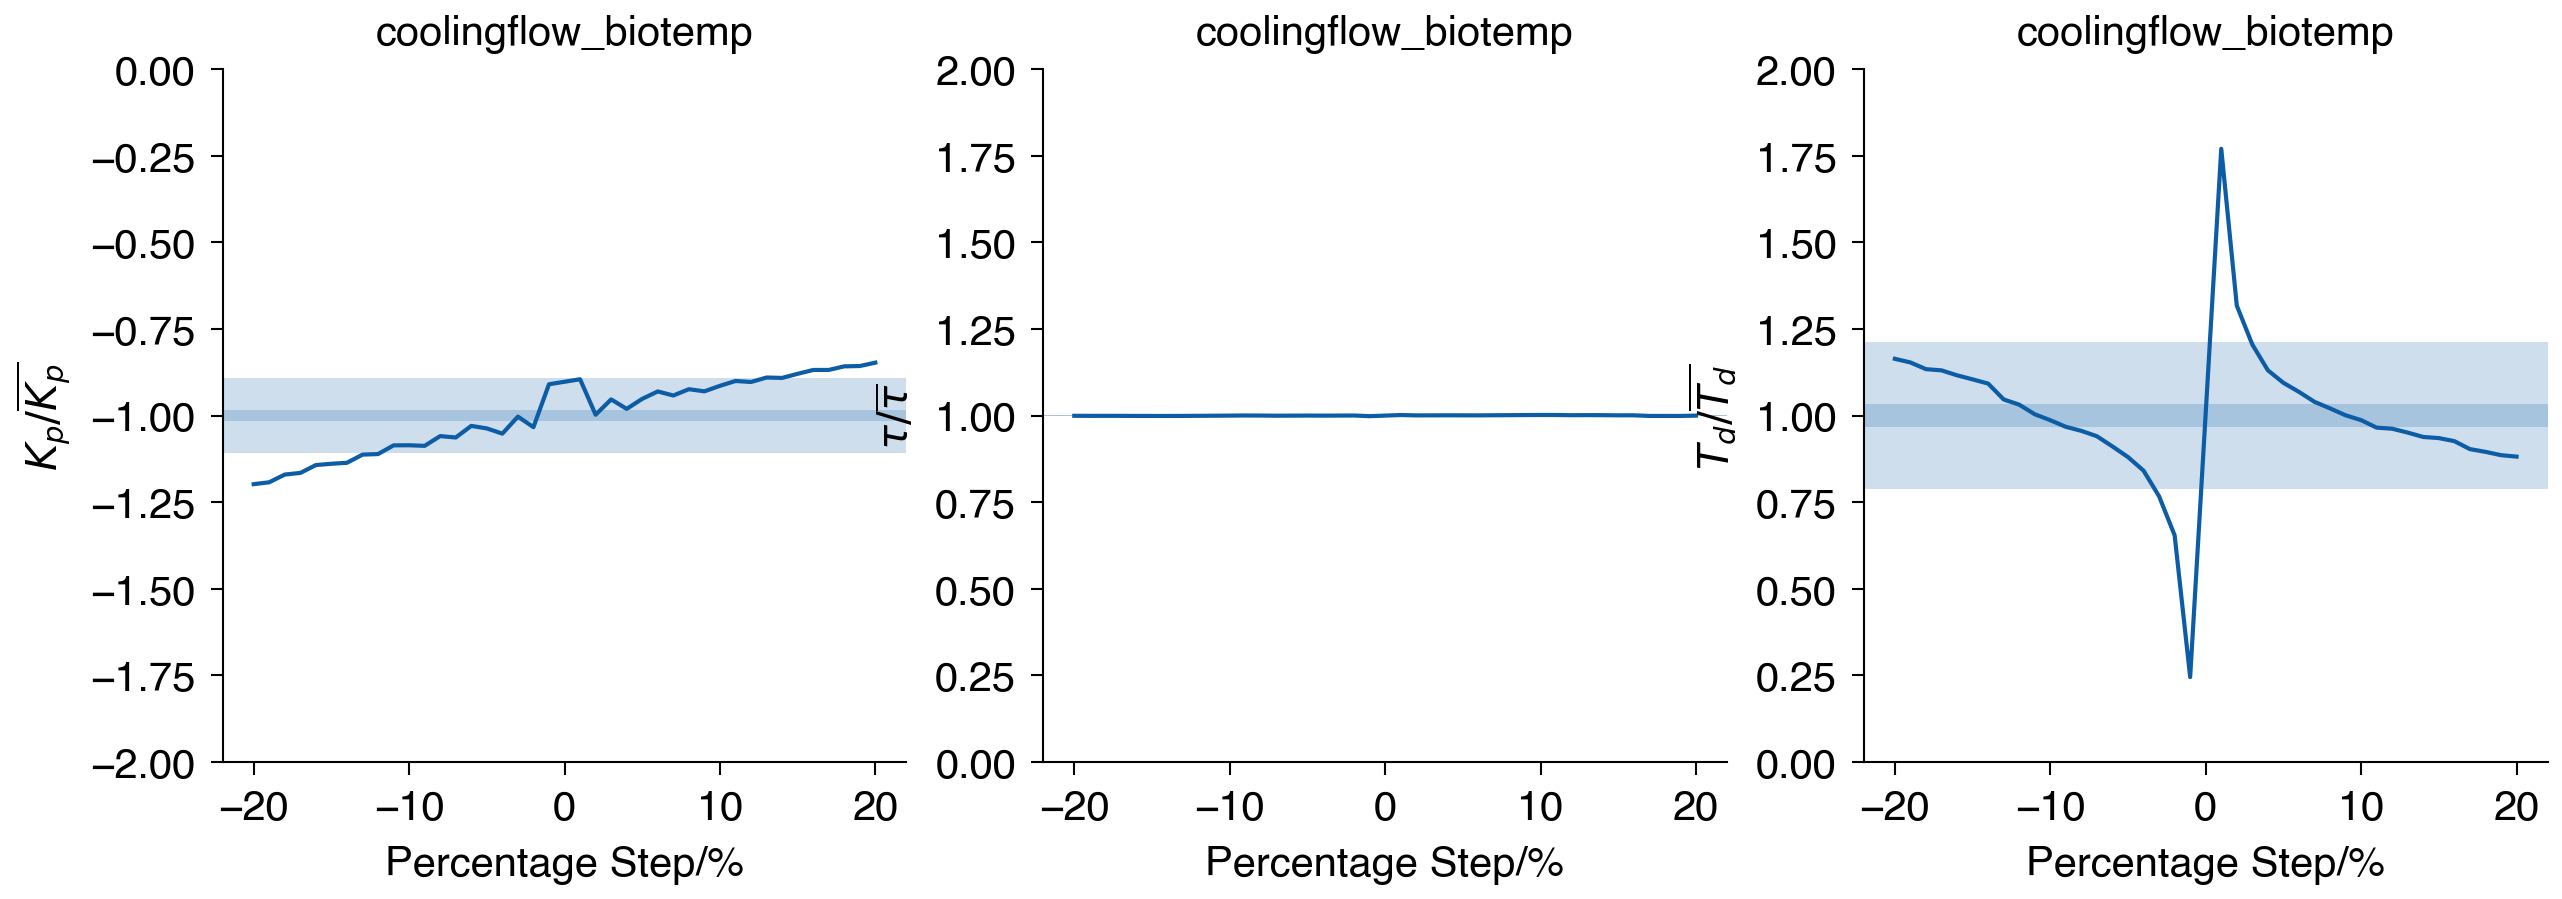

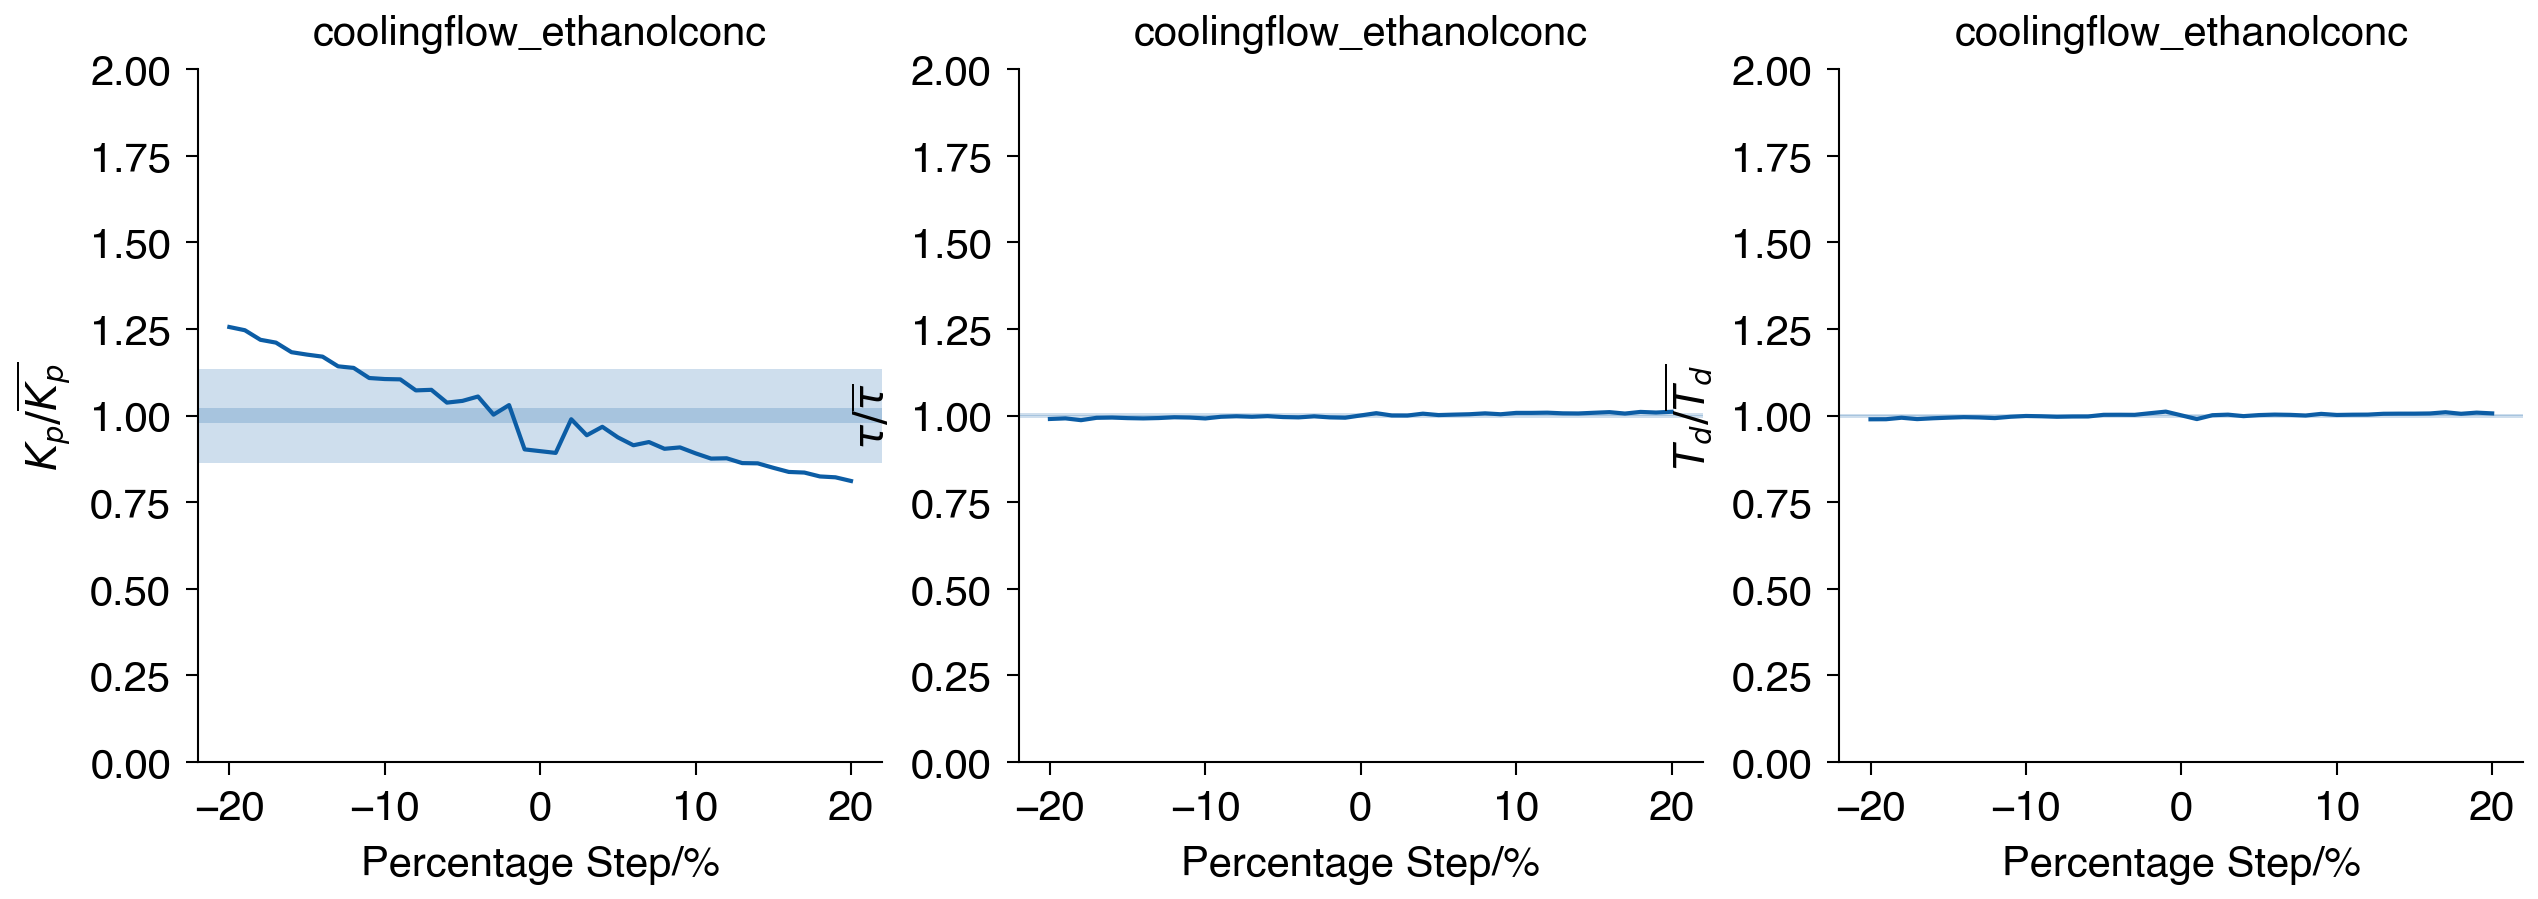

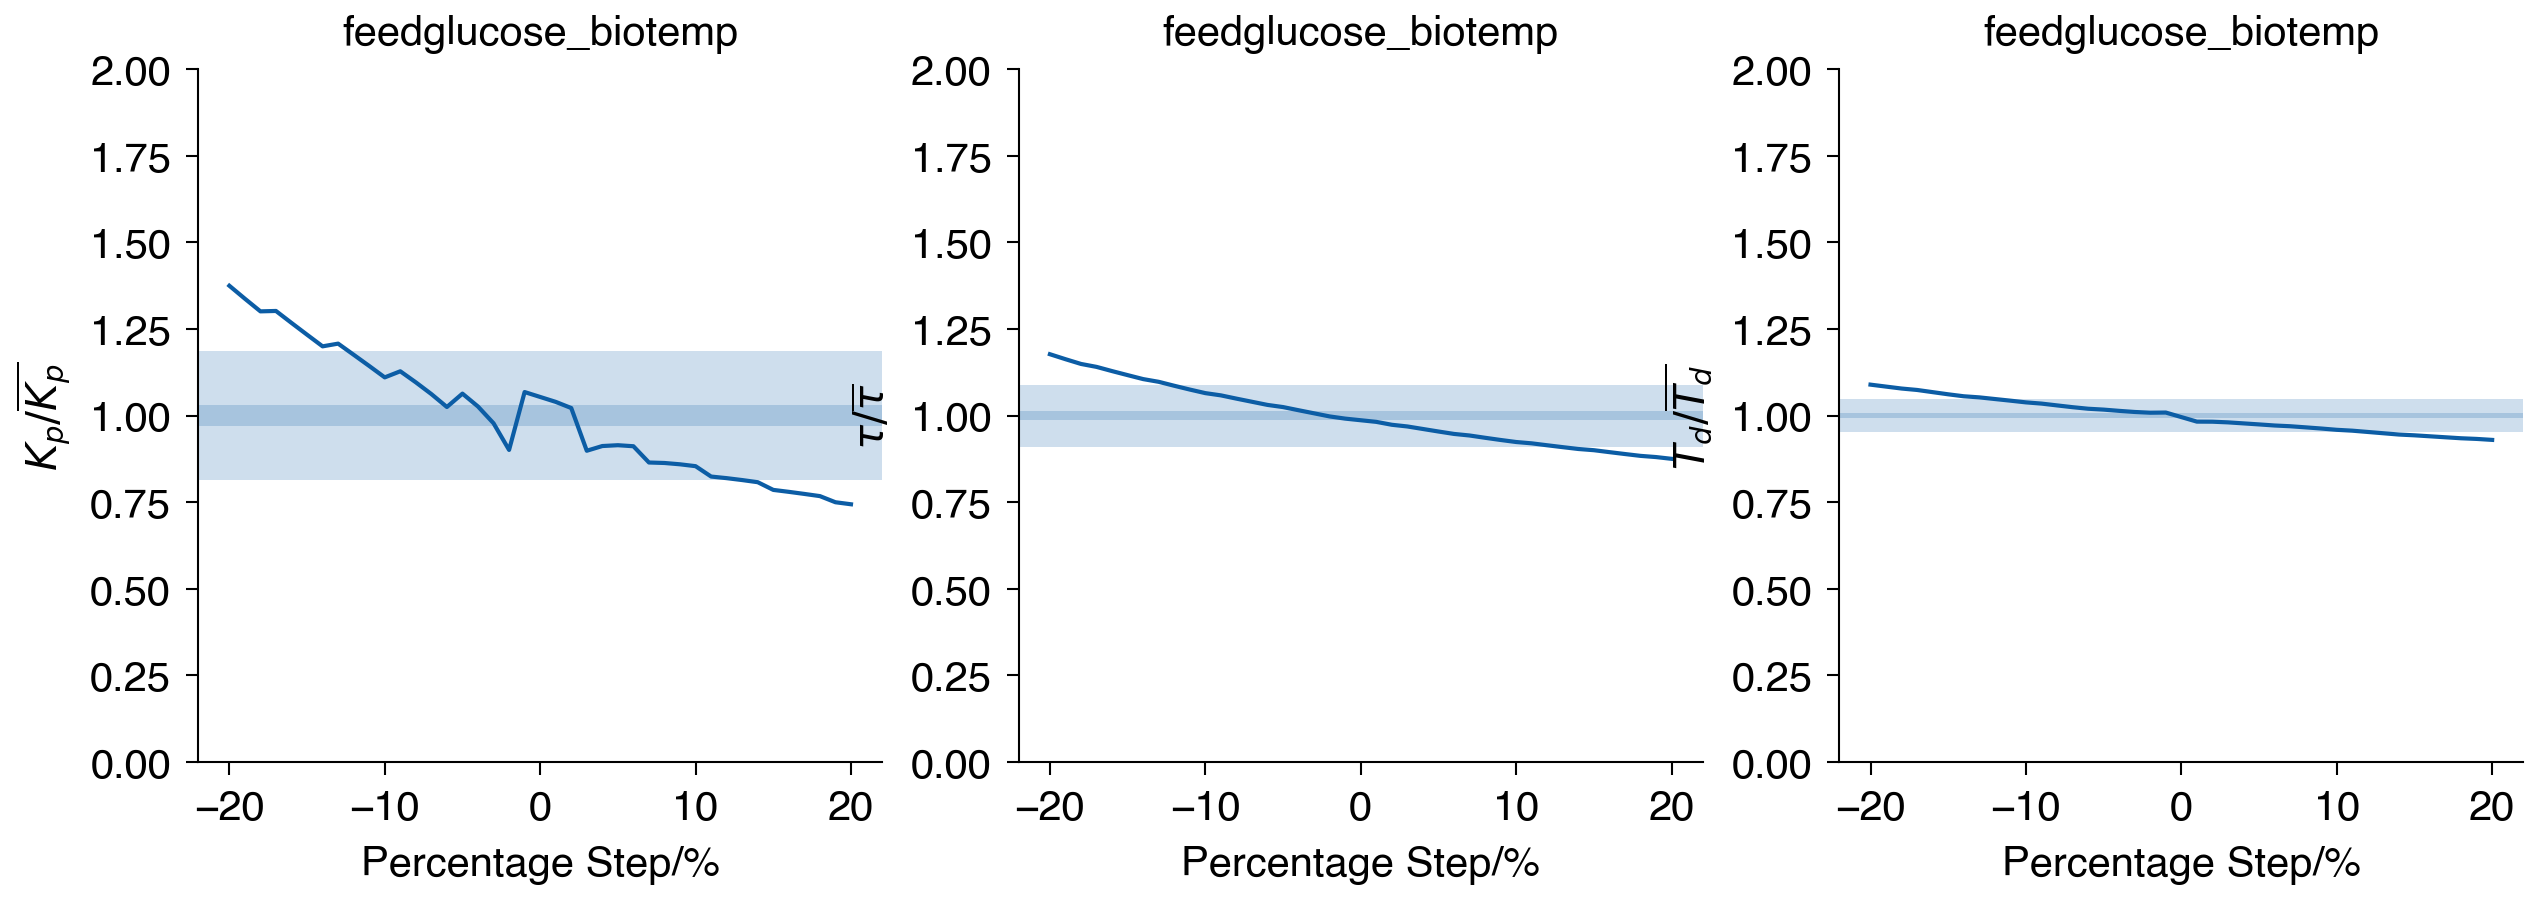

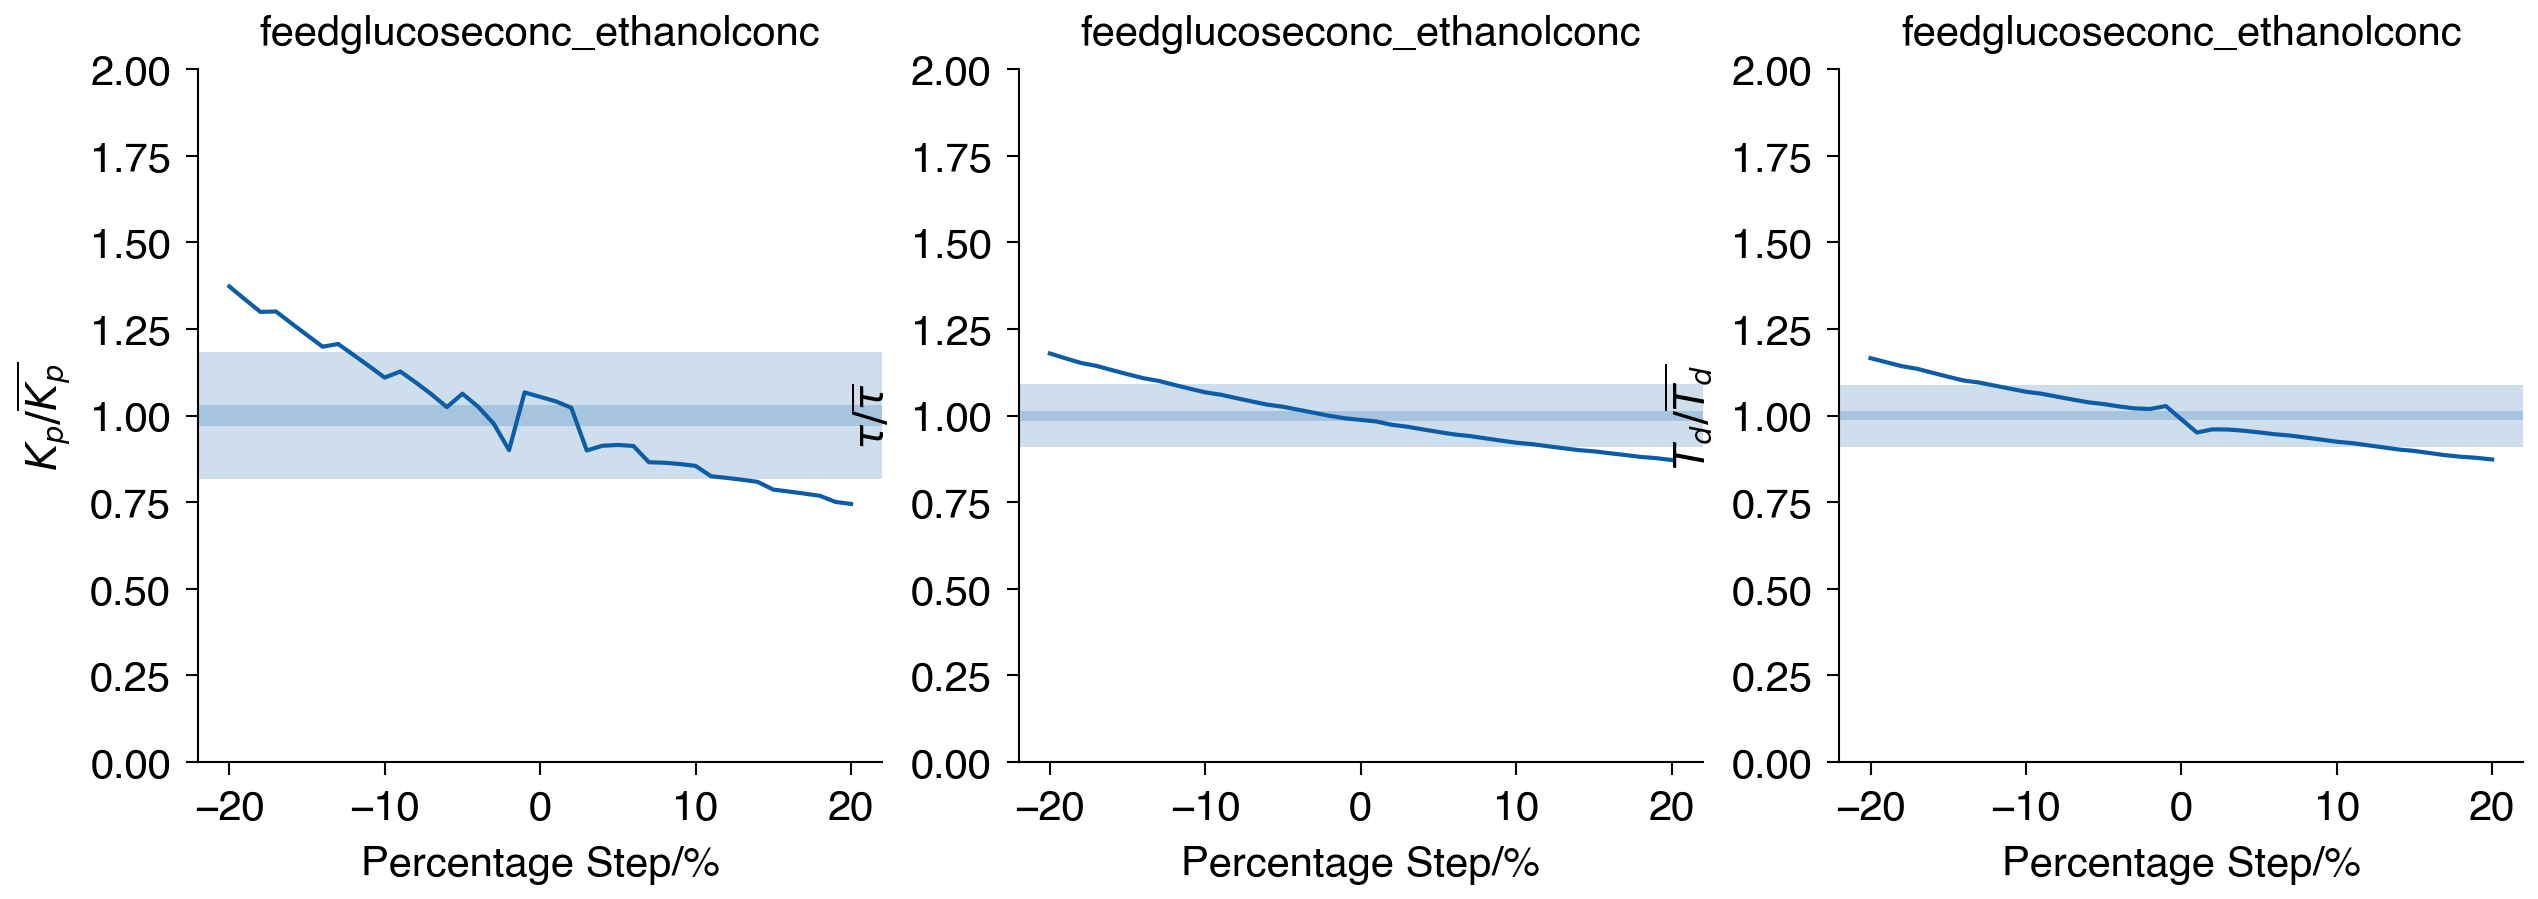

In [19]:
summary(coolingflow_biotemp, "coolingflow_biotemp", True)
summary(coolingflow_ethanolconc, "coolingflow_ethanolconc", True)
summary(feedglucose_biotemp, "feedglucose_biotemp", True)
summary(feedglucoseconc_ethanolconc, "feedglucoseconc_ethanolconc", True)




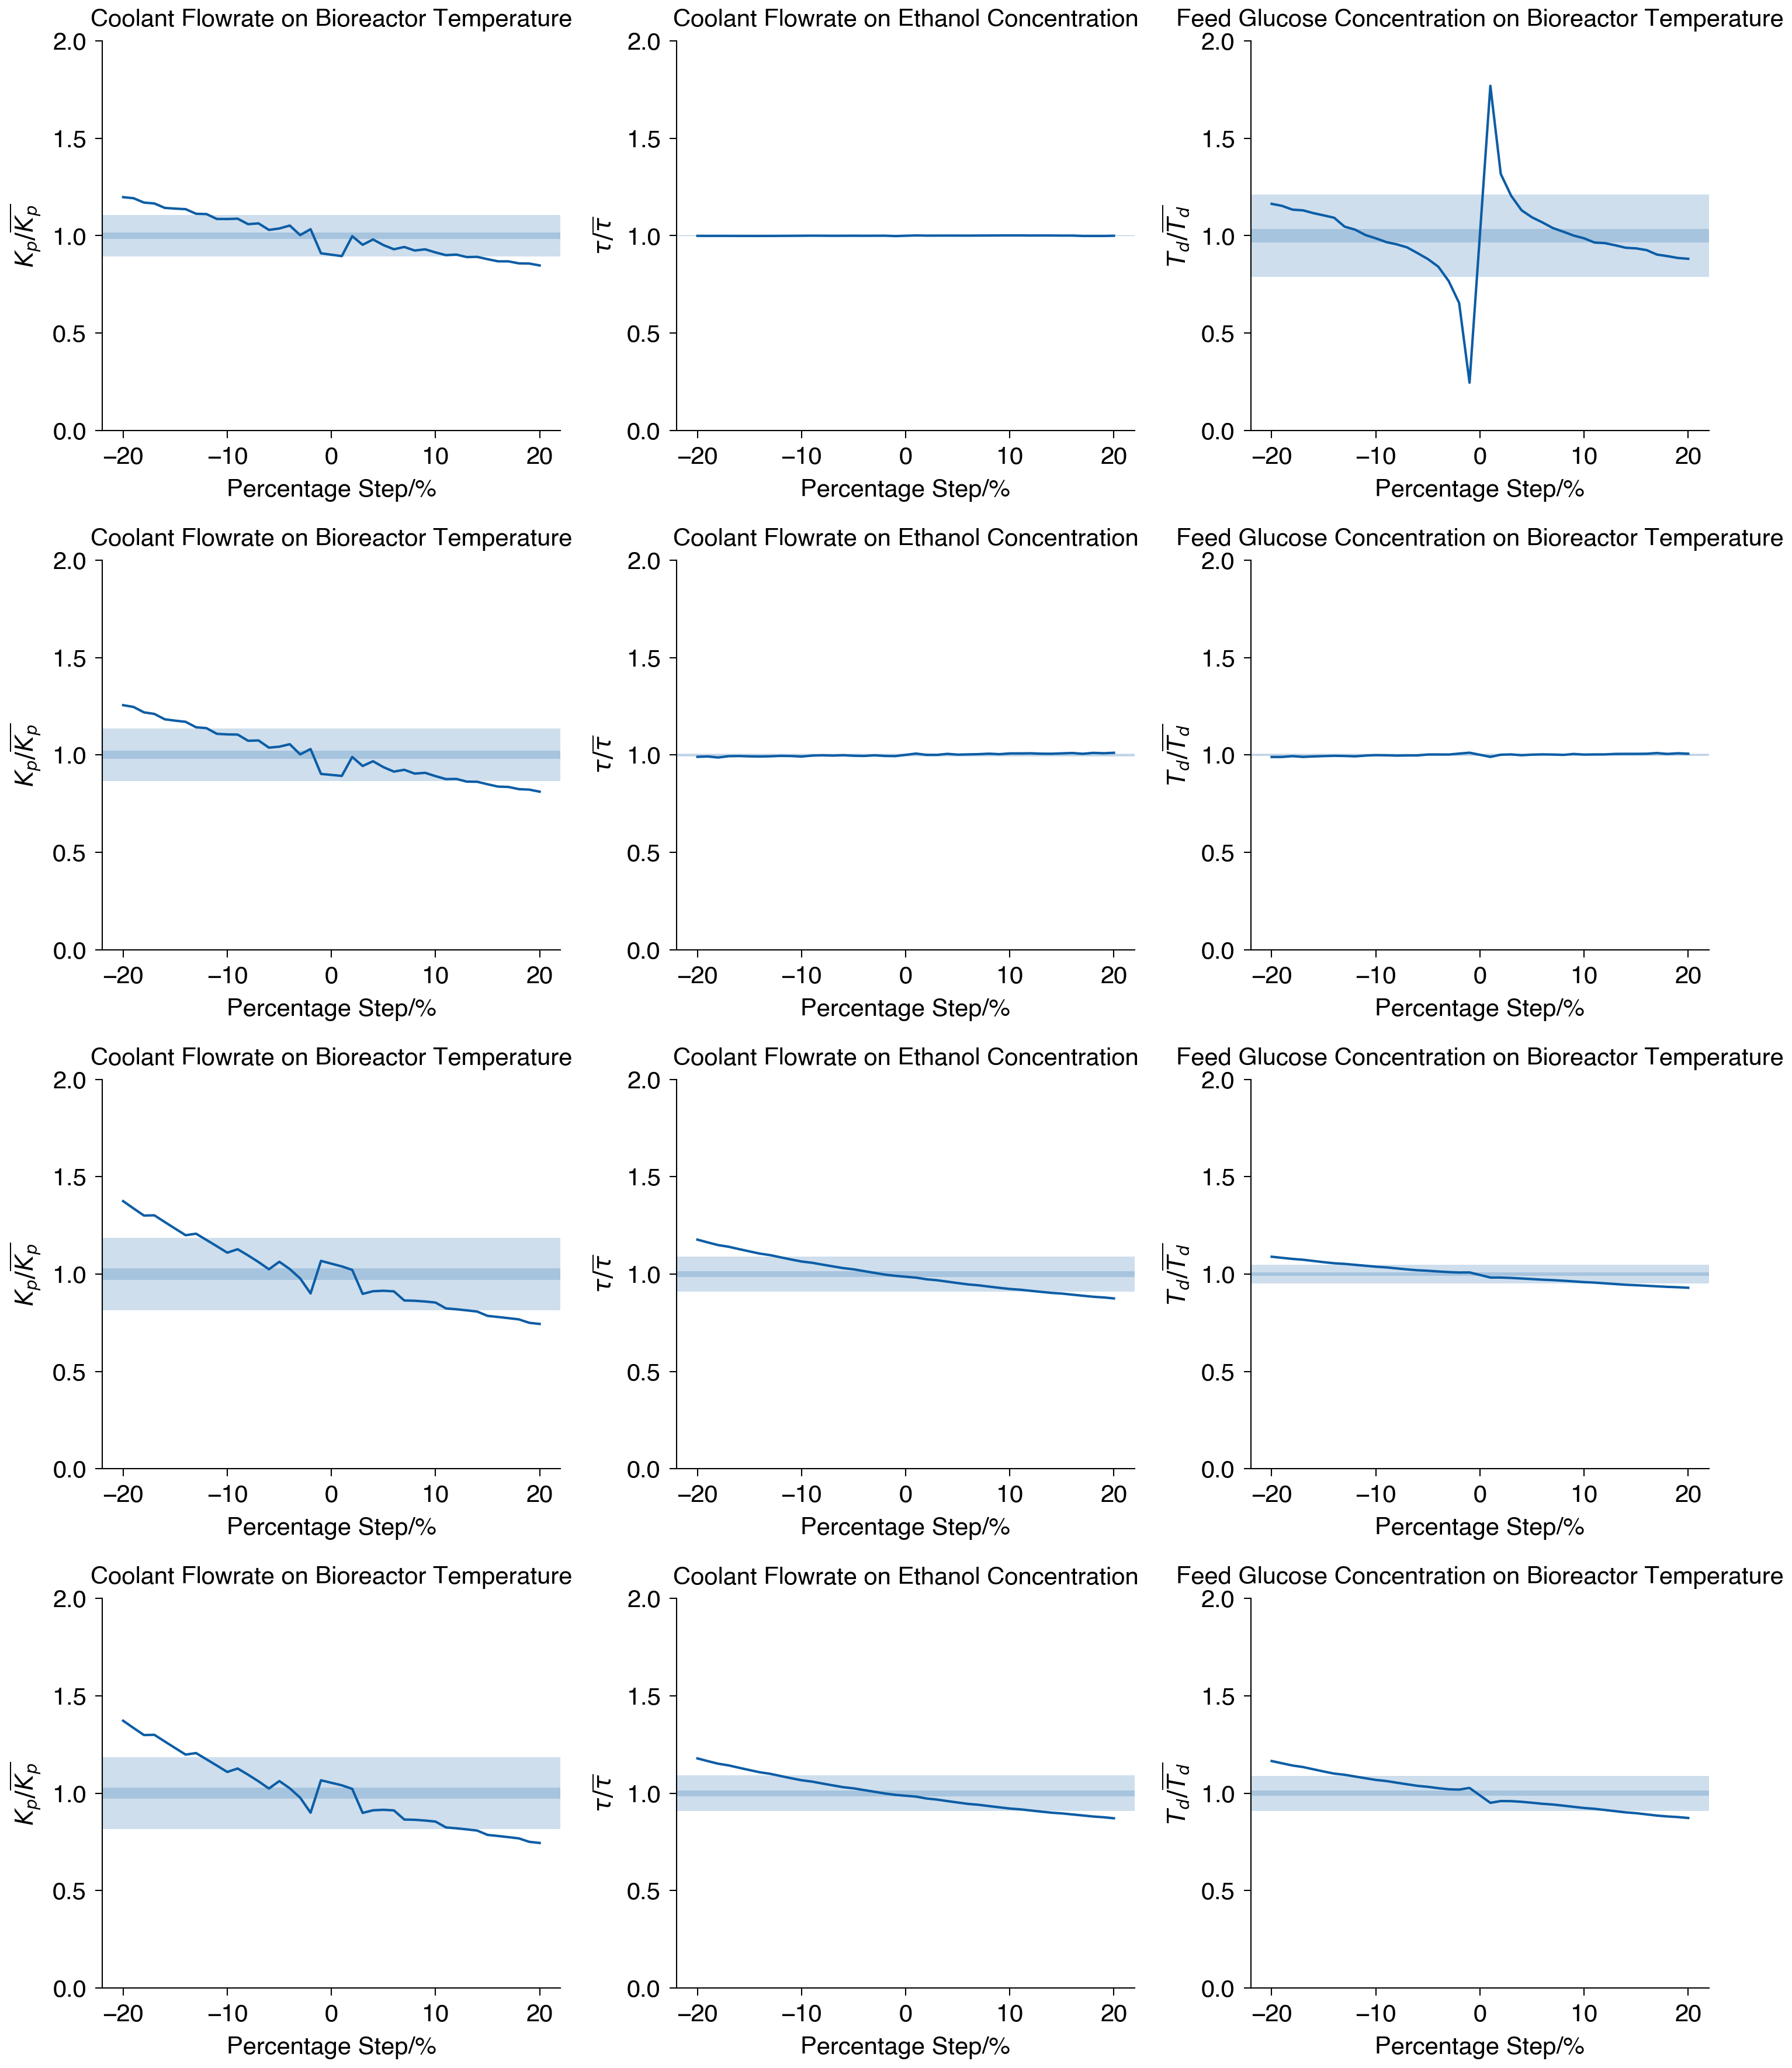

In [20]:
fig, ax = plt.subplots(nrows = 4,ncols = 3)
vars = [coolingflow_biotemp, coolingflow_ethanolconc, feedglucose_biotemp, feedglucoseconc_ethanolconc]
titles = ["Coolant Flowrate on Bioreactor Temperature",
          "Coolant Flowrate on Ethanol Concentration",
          "Feed Glucose Concentration on Bioreactor Temperature",
          "Feed Glucose Concentration on Ethanol Concentration"]
fig.set_size_inches(10,12)
for j in range(4):

    df = vars[j].copy()
    vals = ["Kp", "Tau", "Td"]
    ylabel = [r"$K_p/\overline{K_p}$", r"$\tau/\overline{\tau}$", r"$T_d/\overline{T_d}$"]
    df[vals]= df[vals]/df[vals].mean()

    mean = df.mean()
    sem = df.sem()
    std = df.std()

    for i in range(3):
        val = vals[i]
        sns.lineplot(df, x = "Percent", y = val, ax = ax[j, i])
        ax[j, i].set_title(titles[i])
        ax[j, i].axhspan(mean[val]-sem[val], mean[val]+sem[val], alpha=0.2)
        ax[j, i].axhspan(mean[val]-std[val], mean[val]+std[val], alpha=0.2)
        ax[j, i].set_xlabel("Percentage Step/%")
        if mean[val] > 0:
            ax[j, i].set_ylim([0,2])
        elif mean[val] < 0: 
                ax[j, i].set_ylim([-2,0])
        ax[j, i].set_ylabel(ylabel[i])
plt.tight_layout()



/var/folders/_c/3843qt453ds6klt3y95rpjcw0000gn/T/ipykernel_4440/1401161500.py:29: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x15ed16e50> starts with '_'. It is thus excluded from the legend.
  ax[0].legend(legend, bbox_to_anchor=(1.6, -0.2))
/var/folders/_c/3843qt453ds6klt3y95rpjcw0000gn/T/ipykernel_4440/1401161500.py:29: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x15ed16e50> starts with '_'. It is thus excluded from the legend.
  ax[0].legend(legend, bbox_to_anchor=(1.6, -0.2))
/var/folders/_c/3843qt453ds6klt3y95rpjcw0000gn/T/ipykernel_4440/1401161500.py:29: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x15ed16e50> starts with '_'. It is thus excluded from the legend.
  ax[0].legend(legend, bbox_to_anchor=(1.6, -0.2))
/var/folders/_c/3843qt453ds6klt3y95rpjcw0000gn/T/ipykernel_4440/1401161500.py:29: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x

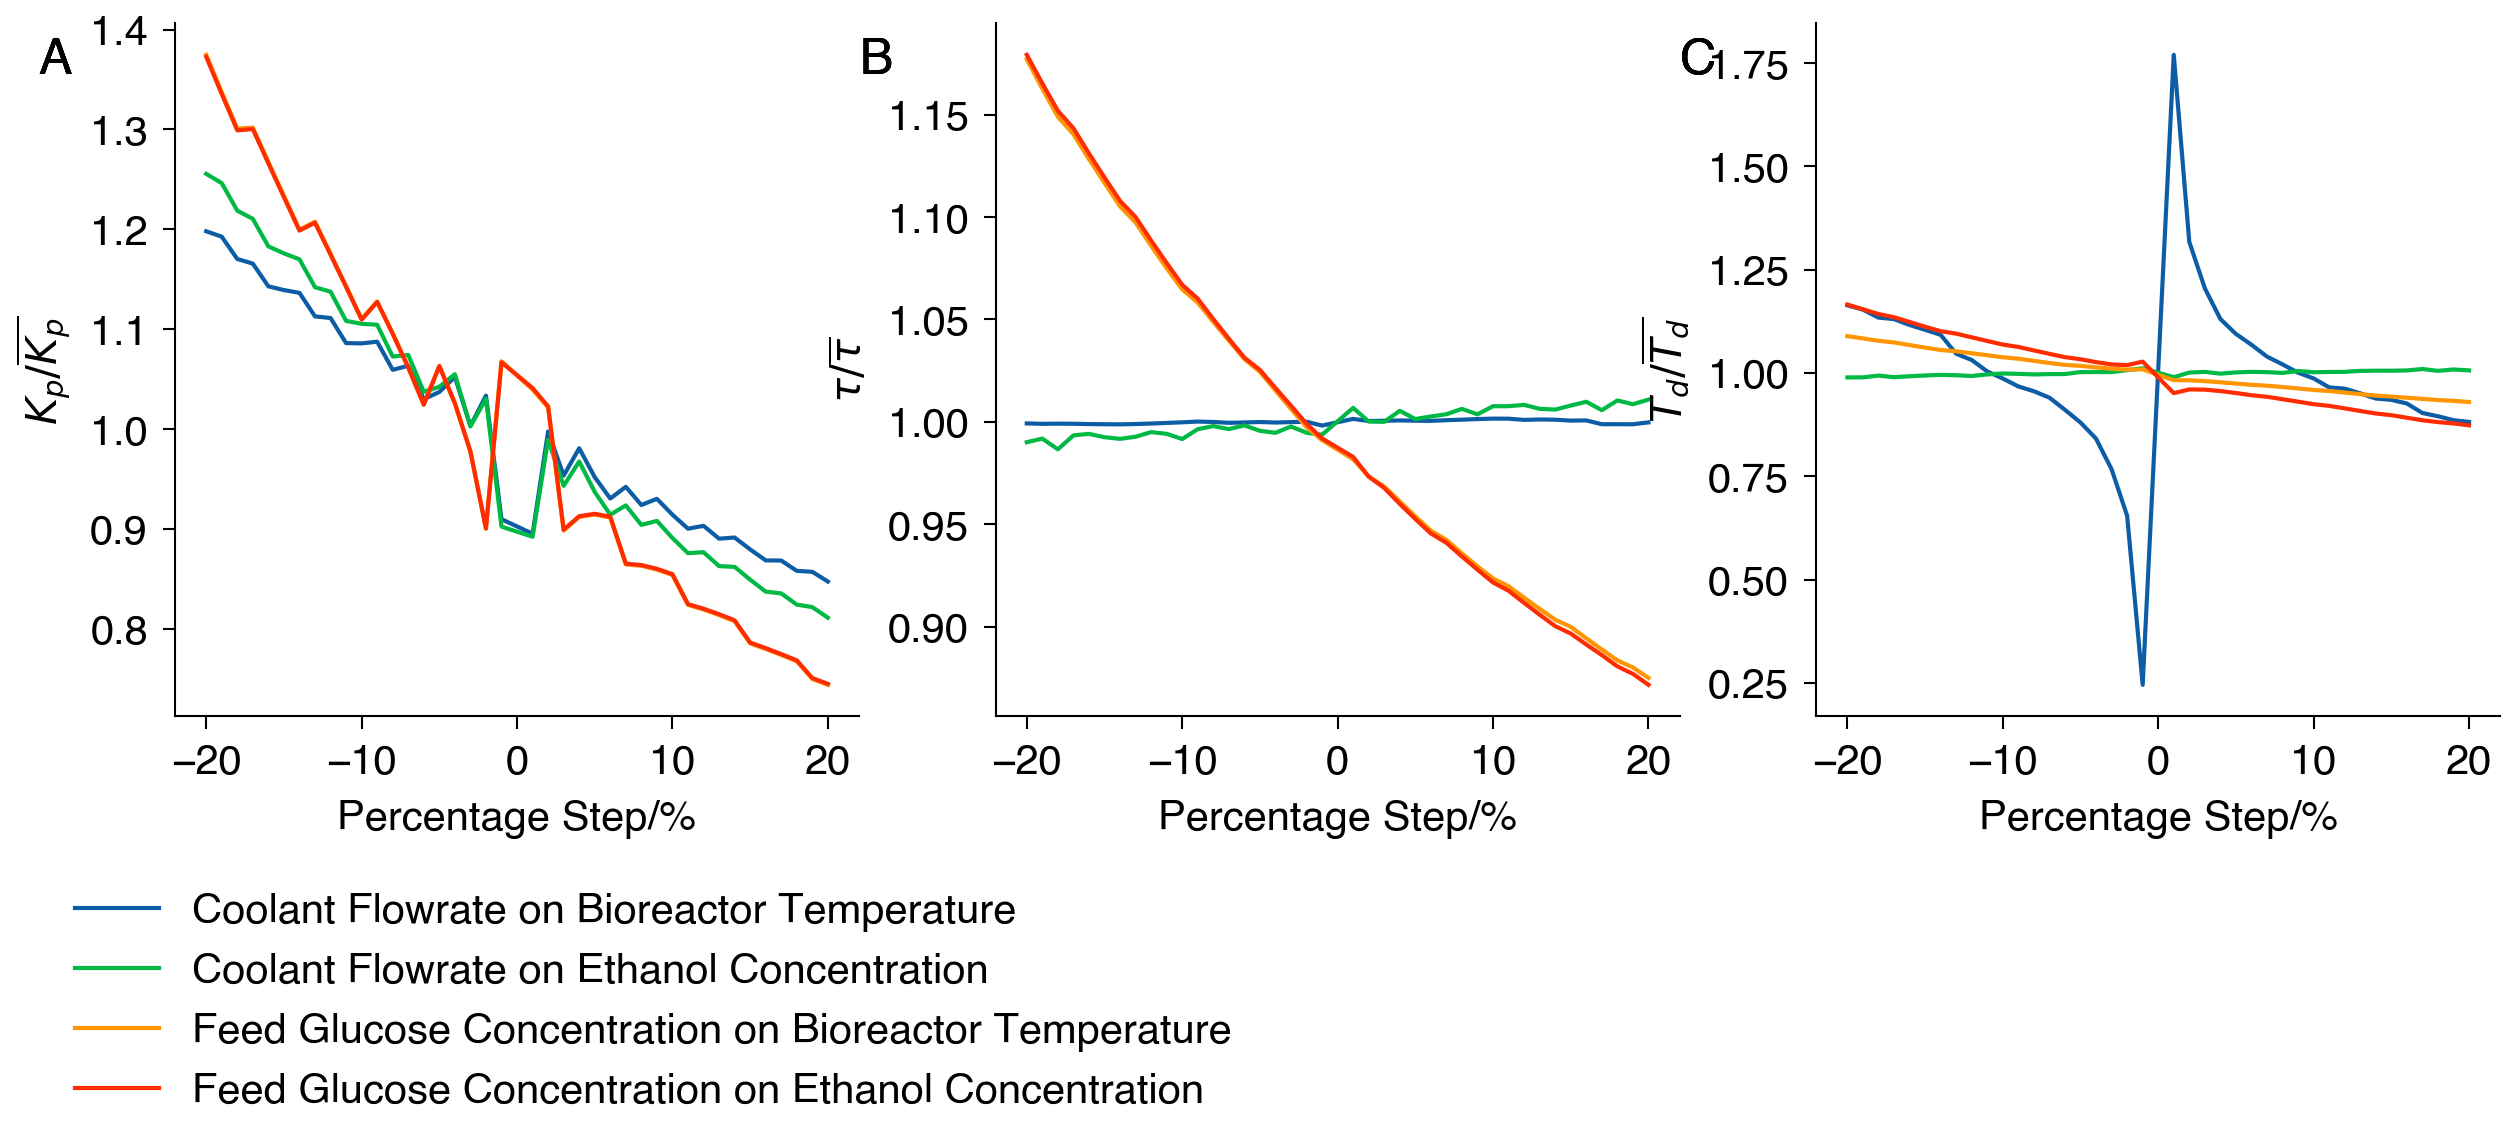

In [21]:
fig, ax = plt.subplots(nrows = 1,ncols = 3)
vars = [coolingflow_biotemp, coolingflow_ethanolconc, feedglucose_biotemp, feedglucoseconc_ethanolconc]
legend = ["Coolant Flowrate on Bioreactor Temperature",
          "Coolant Flowrate on Ethanol Concentration",
          "Feed Glucose Concentration on Bioreactor Temperature",
          "Feed Glucose Concentration on Ethanol Concentration"]
subcaption = ["A", "B", "C"]
legend = [val for pair in zip(legend, ["_"]*4) for val in pair]
fig.set_size_inches(10,3)
for j in range(4):

    df = vars[j].copy()
    vals = ["Kp", "Tau", "Td"]
    ylabel = [r"$K_p/\overline{K_p}$", r"$\tau/\overline{\tau}$", r"$T_d/\overline{T_d}$"]
    df[vals]= df[vals]/df[vals].mean()

    mean = df.mean()
    sem = df.sem()
    std = df.std()

    for i in range(3):
        val = vals[i]
        sns.lineplot(df, x = "Percent", y = val, ax = ax[i])
        # ax[i].axhspan(mean[val]-sem[val], mean[val]+sem[val], alpha=0.2)
        # ax[i].axhspan(mean[val]-std[val], mean[val]+std[val], alpha=0.2)
        ax[i].set_xlabel("Percentage Step/%")

        ax[i].set_ylabel(ylabel[i])
        ax[0].legend(legend, bbox_to_anchor=(1.6, -0.2))
        ax[i].text(-0.2, 0.98, subcaption[i], ha="left", va="top", transform=ax[i].transAxes, fontsize = 12)

plt.savefig("figures/metadata.pdf")
